# Flo Graph

## 필요 라이브러리 로드

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os, math

In [2]:
import platform
from matplotlib import font_manager, rc

# 한글 폰트 지정
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")

In [3]:
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False # 그래프에서 음수 표현 가능하도록 설정.

In [4]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup as bs
import chromedriver_autoinstaller as ca
import random, time
from datetime import datetime

## 파일 불러오기

In [5]:
site_name = 'flo'

In [6]:
# 기간 설정
start_date = '2022-05-02'
end_date = '2022-05-08'

In [7]:
code_path = 'c:/data/Wantreez/Crawling/music'
code_path

'c:/data/Wantreez/Crawling/music'

In [8]:
# 실시간 순위 파일 폴더로 이동
live_folder = f'/crawled_data/mod_{site_name}/'
try:
    os.chdir(code_path + live_folder)
except:
    pass

In [9]:
file_list = os.listdir()
for i, s in enumerate(file_list):
    print(i, s)

0 live_flo_20220405.xlsx
1 live_flo_20220406.xlsx
2 live_flo_20220407.xlsx
3 live_flo_20220412.xlsx
4 live_flo_20220413.xlsx
5 live_flo_20220414_110035.xlsx
6 live_flo_20220415_110026.xlsx
7 live_flo_20220418_110024.xlsx
8 live_flo_20220419_110028.xlsx
9 live_flo_20220420_110013.xlsx
10 live_flo_20220421_110051.xlsx
11 live_flo_20220422_110026.xlsx
12 live_flo_20220423_110023.xlsx
13 live_flo_20220425_110022.xlsx
14 live_flo_20220426_110029.xlsx
15 live_flo_20220427_110027.xlsx
16 live_flo_20220428_110009.xlsx
17 live_flo_20220429_110008.xlsx
18 live_flo_20220430_110005.xlsx
19 live_flo_20220501_110005.xlsx
20 live_flo_20220502_110110.xlsx
21 live_flo_20220503_110005.xlsx
22 live_flo_20220504_110005.xlsx
23 live_flo_20220505_110006.xlsx
24 live_flo_20220506_110005.xlsx
25 live_flo_20220507_110006.xlsx
26 live_flo_20220508_110005.xlsx
27 live_flo_20220509_110006.xlsx


## 수집한 파일 모두 합치기

In [10]:
df = pd.DataFrame()
for one in file_list:
    temp = pd.read_excel(one)
    df = pd.concat([df, temp], ignore_index=True)
df.head()

사이트          날짜  순위                     곡                 가수  \
0  flo  2022-04-05   1  봄여름가을겨울 (Still Life)       BIGBANG (빅뱅)   
1  flo  2022-04-05   2                TOMBOY            (여자)아이들   
2  flo  2022-04-05   3        Feel My Rhythm  Red Velvet (레드벨벳)   
3  flo  2022-04-05   4                사랑인가 봐               멜로망스   
4  flo  2022-04-05   5  GANADARA (Feat. 아이유)                박재범   

                                          앨범          소속사 소속사_분류  
0                       봄여름가을겨울 (Still Life)           YG     YG  
1                                I NEVER DIE         CUBE     기타  
2  ‘The ReVe Festival 2022 - Feel My Rhythm’           SM     SM  
3                   사랑인가 봐 (사내맞선 OST 스페셜 트랙)        ABYSS     기타  
4                                   GANADARA  MORE VISION     기타

In [11]:
df['날짜'] = df['날짜'].astype(str)

In [12]:
sliced_df = df[(df['날짜'] >= start_date) & (df['날짜'] <= end_date)].reset_index(drop=True)
sliced_df.head()

사이트          날짜  순위                                      곡            가수  \
0  flo  2022-05-02   1                   봄여름가을겨울 (Still Life)  BIGBANG (빅뱅)   
1  flo  2022-05-02   2                              LOVE DIVE     IVE (아이브)   
2  flo  2022-05-02   3                                 TOMBOY       (여자)아이들   
3  flo  2022-05-02   4  That That (prod. & feat. SUGA of BTS)      싸이 (PSY)   
4  flo  2022-05-02   5                                 사랑인가 봐          멜로망스   

                         앨범       소속사 소속사_분류  
0      봄여름가을겨울 (Still Life)        YG     YG  
1                 LOVE DIVE       스타쉽    스타쉽  
2               I NEVER DIE      CUBE     기타  
3                       싸다9  P NATION     기타  
4  사랑인가 봐 (사내맞선 OST 스페셜 트랙)     ABYSS     기타

In [13]:
sliced_df.tail()

사이트          날짜   순위                                               곡  \
695  flo  2022-05-08   96                                  만개 (Prod. 신지후)   
696  flo  2022-05-08   97  만남은 쉽고 이별은 어려워 (Feat. Leellamarz) (Prod. TOIL)   
697  flo  2022-05-08   98                                  그날에 나는 맘이 편했을까   
698  flo  2022-05-08   99                              밤이 깊었네 (feat. 헤이즈)   
699  flo  2022-05-08  100                                      나보다 더 사랑해요   

               가수                  앨범        소속사 소속사_분류  
695           김호중                 우리家         생각     기타  
696  베이식 (Basick)  쇼미더머니 10 Episode 3         개인     기타  
697           이예준      그날에 나는 맘이 편했을까  iMe KOREA     기타  
698      싸이 (PSY)                 싸다9   P NATION     기타  
699           김호중          나보다 더 사랑해요         생각     기타

In [14]:
sliced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사이트     700 non-null    object
 1   날짜      700 non-null    object
 2   순위      700 non-null    int64 
 3   곡       700 non-null    object
 4   가수      700 non-null    object
 5   앨범      698 non-null    object
 6   소속사     700 non-null    object
 7   소속사_분류  700 non-null    object
dtypes: int64(1), object(7)
memory usage: 43.9+ KB


### 수집한 곡의 유니크

In [15]:
len(sliced_df['곡'].unique())

115

In [16]:
dates = pd.date_range(start_date, end_date)
basic_date_df = pd.DataFrame({'날짜':dates})
basic_date_df['날짜'] = basic_date_df['날짜'].astype('str')
basic_date_df

날짜
0  2022-05-02
1  2022-05-03
2  2022-05-04
3  2022-05-05
4  2022-05-06
5  2022-05-07
6  2022-05-08

### 제목과 가수 매칭 값 추출

In [17]:
sort_df = sliced_df[['곡', '가수']]
sort_df

곡            가수
0                              봄여름가을겨울 (Still Life)  BIGBANG (빅뱅)
1                                         LOVE DIVE     IVE (아이브)
2                                            TOMBOY       (여자)아이들
3             That That (prod. & feat. SUGA of BTS)      싸이 (PSY)
4                                            사랑인가 봐          멜로망스
..                                              ...           ...
695                                  만개 (Prod. 신지후)           김호중
696  만남은 쉽고 이별은 어려워 (Feat. Leellamarz) (Prod. TOIL)  베이식 (Basick)
697                                  그날에 나는 맘이 편했을까           이예준
698                              밤이 깊었네 (feat. 헤이즈)      싸이 (PSY)
699                                      나보다 더 사랑해요           김호중

[700 rows x 2 columns]

In [18]:
sort_df = sort_df.drop_duplicates(['곡', '가수'], ignore_index=True)
sort_df

곡                  가수
0                     봄여름가을겨울 (Still Life)        BIGBANG (빅뱅)
1                                LOVE DIVE           IVE (아이브)
2                                   TOMBOY             (여자)아이들
3    That That (prod. & feat. SUGA of BTS)            싸이 (PSY)
4                                   사랑인가 봐                멜로망스
..                                     ...                 ...
110                                   인생찬가                 임영웅
111                               FEARLESS  LE SSERAFIM (르세라핌)
112                                     초대                멜로망스
113                         만개 (Prod. 신지후)                 김호중
114                             나보다 더 사랑해요                 김호중

[115 rows x 2 columns]

### 순위변동 열 추가한 df 생성
* 기본 날짜에 데이터 추가
* nan값 중 곡, 가수, 앨범 명은 해당 가수의 정보로 채우기

In [19]:
song_df_list = []
for i in range(sort_df.shape[0]):
    temp = sort_df.iloc[i, :]
    one_df = sliced_df[(sliced_df['곡'] == temp['곡']) & (sliced_df['가수'] == temp['가수'])].reset_index(drop=True)
    one_df['순위변동'] = - ( one_df['순위'] - one_df['순위'].shift(1) )
    one_df['순위변동'] = one_df['순위변동'].fillna(0)
    one_df['순위변동'] = one_df['순위변동'].astype('int64')
    merged_df = pd.merge(basic_date_df, one_df, how='left', on='날짜')
    title = merged_df['곡'].value_counts().index[0]
    artist = merged_df['가수'].value_counts().index[0]
    album = merged_df['앨범'].value_counts().index[0]
    merged_df['곡'] = merged_df['곡'].fillna(title)
    merged_df['가수'] = merged_df['가수'].fillna(artist)
    merged_df['앨범'] = merged_df['앨범'].fillna(album)
    song_df_list.append(merged_df)

### 노래 개수

In [20]:
len(song_df_list)

115

## 그래프 테스트

### 노래 선택

In [21]:
song_df_list[16].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 0 to 6
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      7 non-null      object
 1   사이트     7 non-null      object
 2   순위      7 non-null      int64 
 3   곡       7 non-null      object
 4   가수      7 non-null      object
 5   앨범      7 non-null      object
 6   소속사     7 non-null      object
 7   소속사_분류  7 non-null      object
 8   순위변동    7 non-null      int64 
dtypes: int64(2), object(7)
memory usage: 560.0+ bytes


In [22]:
tmp = song_df_list[100]
tmp

날짜  사이트    순위            곡   가수       앨범    소속사 소속사_분류  순위변동
0  2022-05-02  NaN   NaN  다시 만날 수 있을까  임영웅  IM HERO    NaN    NaN   NaN
1  2022-05-03  flo  14.0  다시 만날 수 있을까  임영웅  IM HERO  물고기뮤직     기타   0.0
2  2022-05-04  flo  11.0  다시 만날 수 있을까  임영웅  IM HERO  물고기뮤직     기타   3.0
3  2022-05-05  flo   9.0  다시 만날 수 있을까  임영웅  IM HERO  물고기뮤직     기타   2.0
4  2022-05-06  flo   9.0  다시 만날 수 있을까  임영웅  IM HERO  물고기뮤직     기타   0.0
5  2022-05-07  flo   9.0  다시 만날 수 있을까  임영웅  IM HERO  물고기뮤직     기타   0.0
6  2022-05-08  flo   8.0  다시 만날 수 있을까  임영웅  IM HERO  물고기뮤직     기타   1.0

In [23]:
tmp['곡'].value_counts().index.values[0]

'다시 만날 수 있을까'

In [24]:
tmp['가수'].value_counts().index.values[0]

'임영웅'

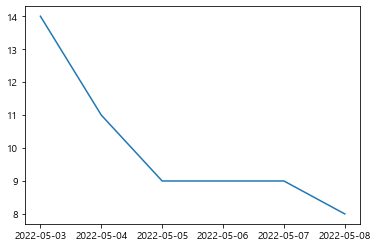

In [25]:
plt.plot(tmp['날짜'], tmp['순위'])

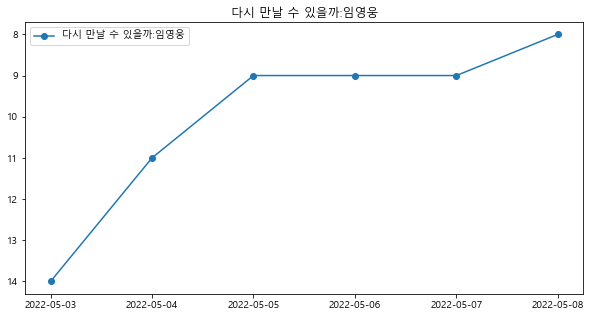

In [26]:
title = tmp['곡'].value_counts().index.values[0]
artist = tmp['가수'].value_counts().index.values[0]
song_label = title + ':' + artist

plt.figure(figsize=(10,5))
ax = plt.axes()
ax.invert_yaxis()
plt.plot(tmp['날짜'], tmp['순위'], '-o', label=song_label)
plt.title(song_label)
plt.legend()
plt.show()

In [27]:
temp_df = song_df_list[70:91]

### 그래프

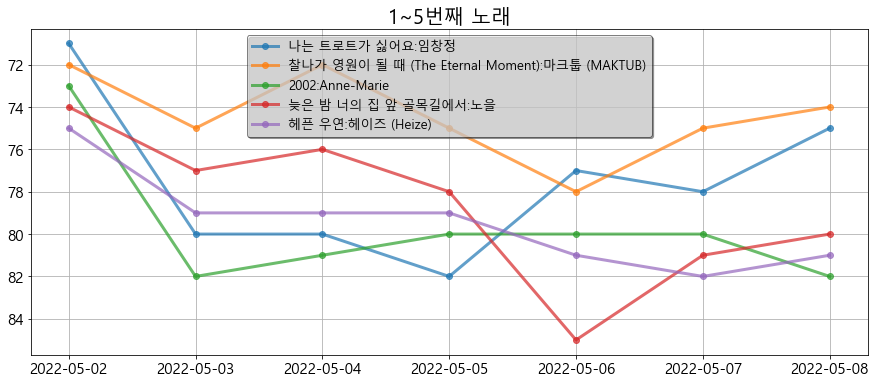

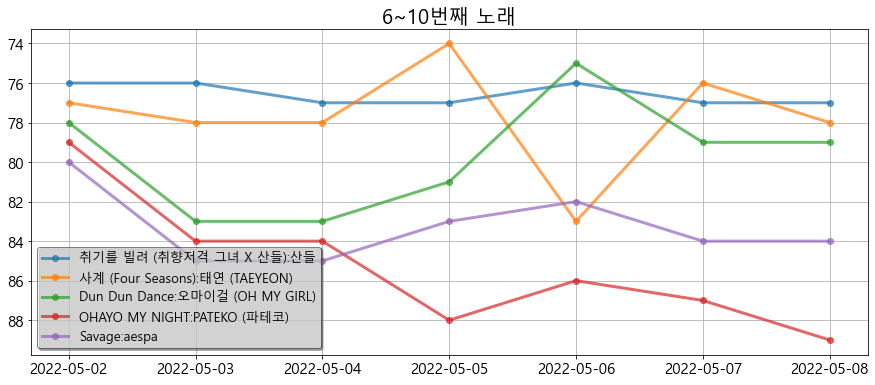

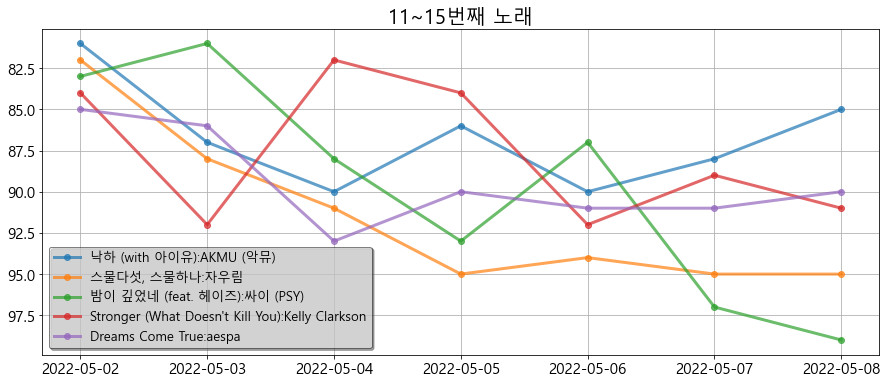

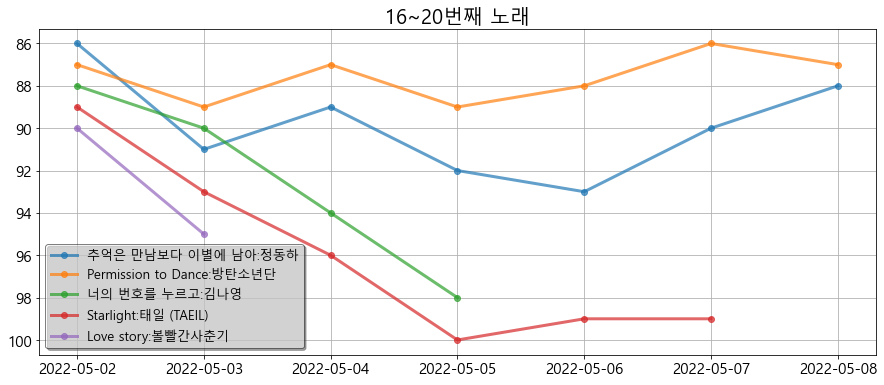

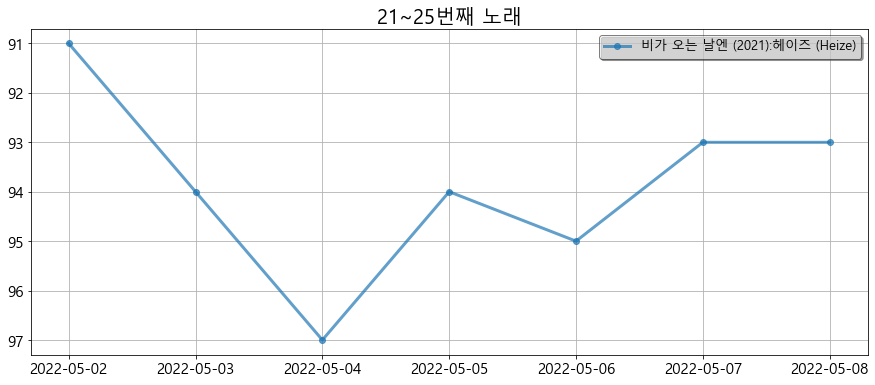

In [28]:
number = 5
t = 0
for i in range( math.ceil(len(temp_df)/number) ):
    plt.figure( figsize=(15, 6) )
    ax = plt.axes()
    ax.invert_yaxis()
    graph_df = temp_df[i*number:(i+1)*number]
    for one in graph_df:
        title = one['곡'].value_counts().index.values[0]
        artist = one['가수'].value_counts().index.values[0]
        song_label = title + ':' + artist
        plt.plot(one['날짜'], one['순위'], '-o', label=song_label, alpha=0.7, linewidth=3)
    t =  t + number
    plt.grid(True)
    plt.title(f'{t-(number-1)}~{t}번째 노래', fontdict={'size':20})
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.legend(framealpha=0.5, frameon=True, shadow=True, edgecolor='k', fontsize=13)
    plt.show()

## 몇 개씩 묶어서 노래 시각화

### 순위 그래프

In [29]:
def rank_graph(df, number):
    t = 0
    for i in range( math.ceil(len(df)/number) ):
        plt.figure( figsize=(15, 8) )
        ax = plt.axes()
        ax.invert_yaxis()
        graph_df = df[i*number:(i+1)*number]
        for one in graph_df:
            title = one['곡'].value_counts().index.values[0]
            artist = one['가수'].value_counts().index.values[0]
            song_label = title + ' : ' + artist
            plt.plot(one['날짜'], one['순위'], '-o', label=song_label, linewidth=3, alpha=0.7)
        t =  t + number
        plt.grid(True)
        plt.title(f'{t-(number-1)}~{t}번째 노래', fontdict={'size':20})
        plt.xticks(fontsize=15)
        plt.yticks(fontsize=15)
        plt.legend(framealpha=0.5, fontsize=13, frameon=True, edgecolor='k', shadow=True)
        plt.show()

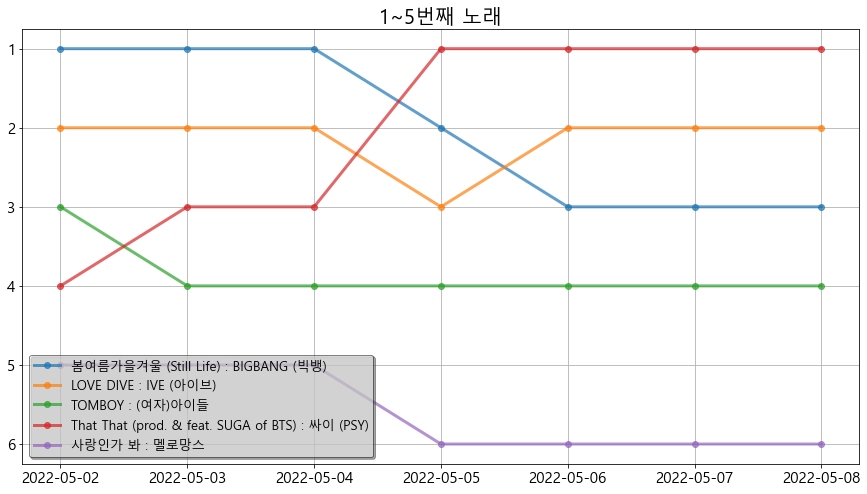

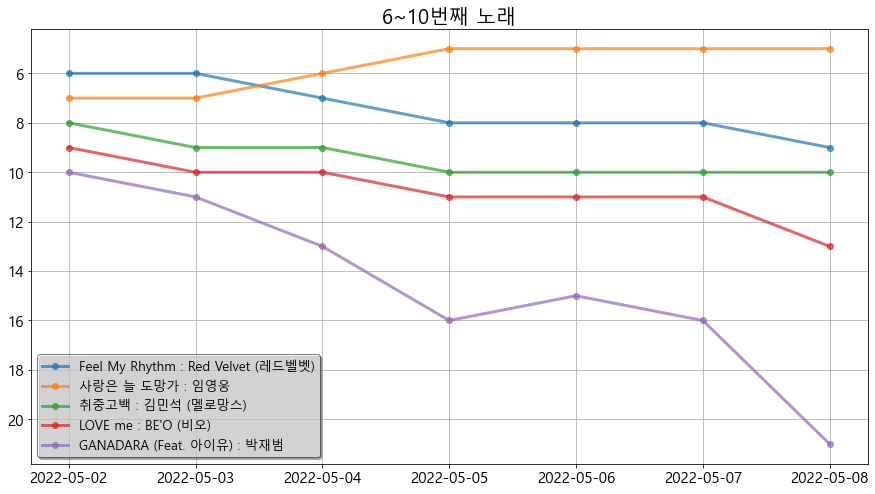

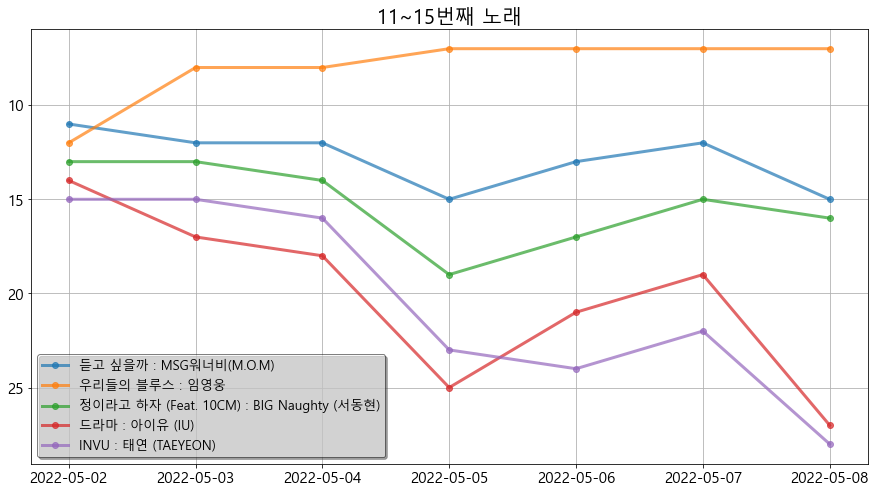

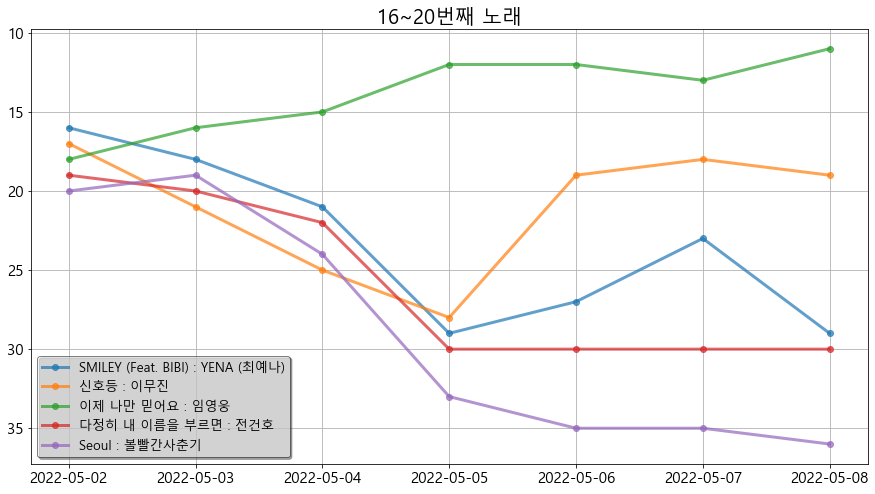

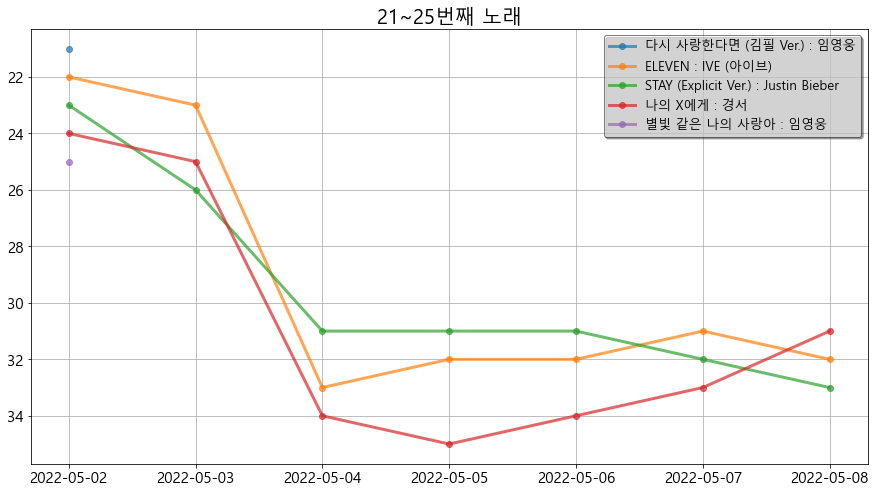

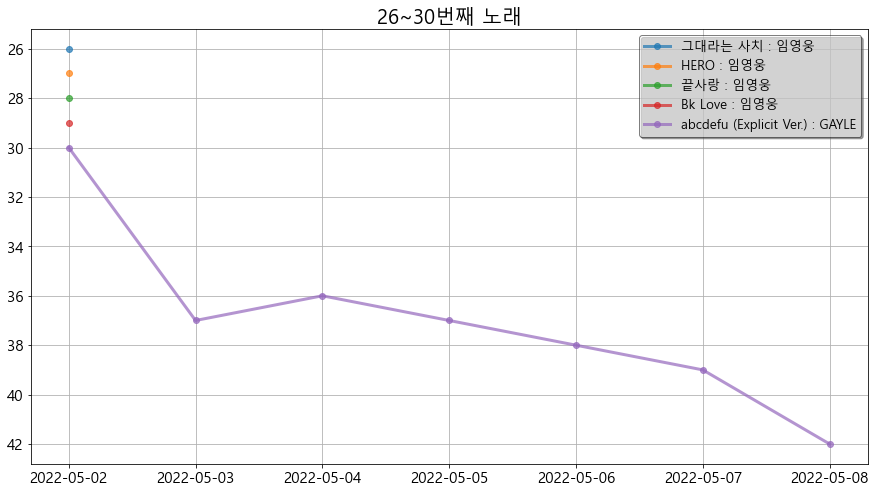

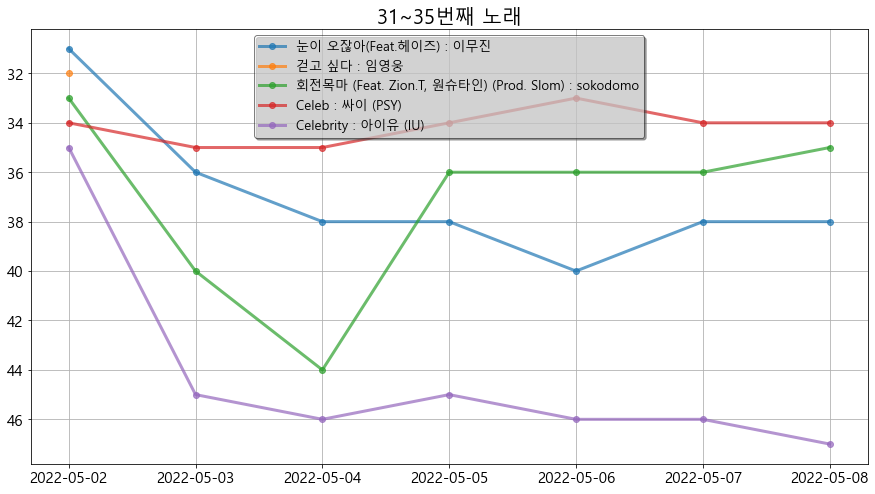

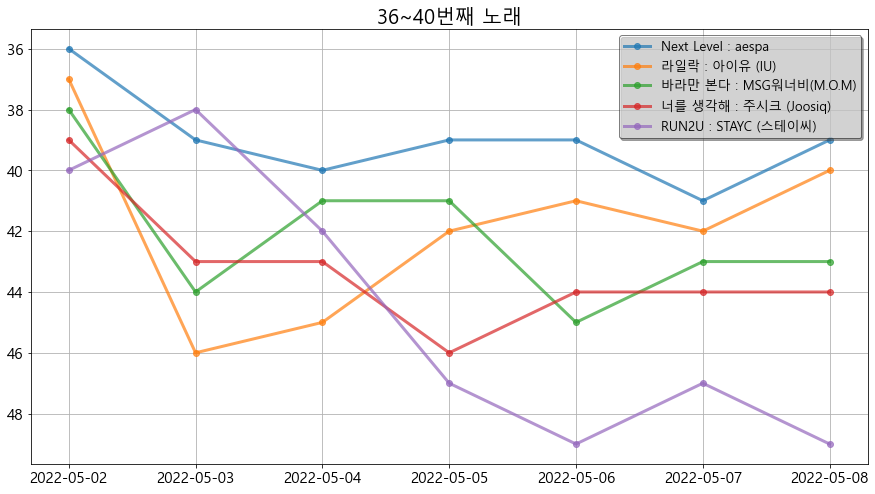

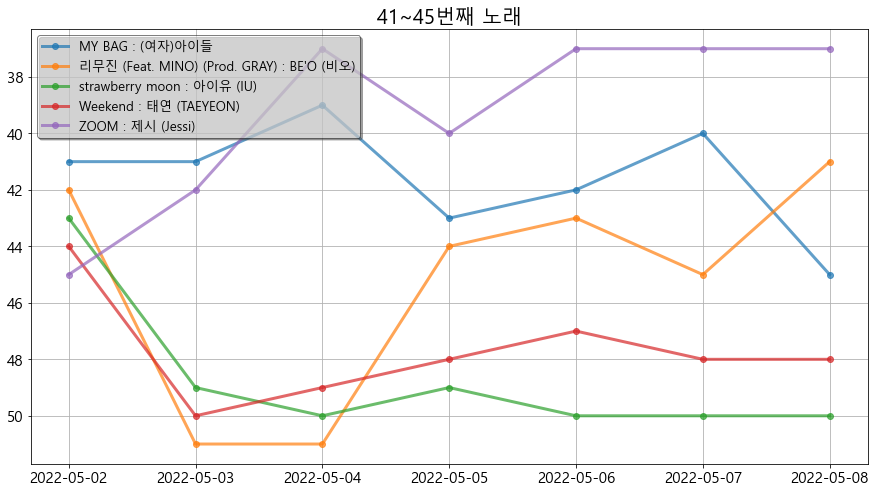

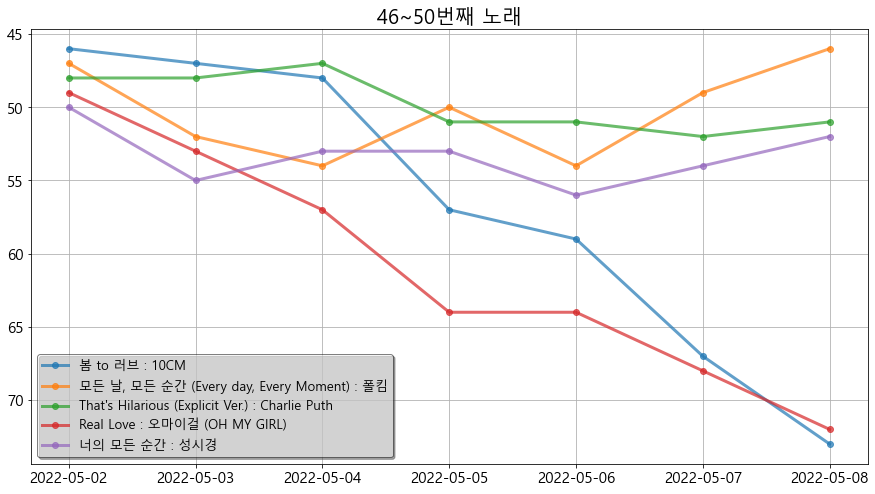

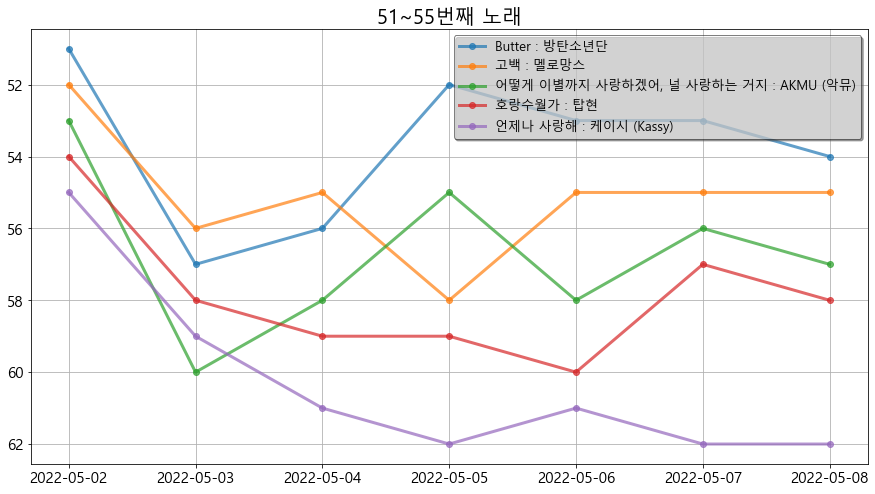

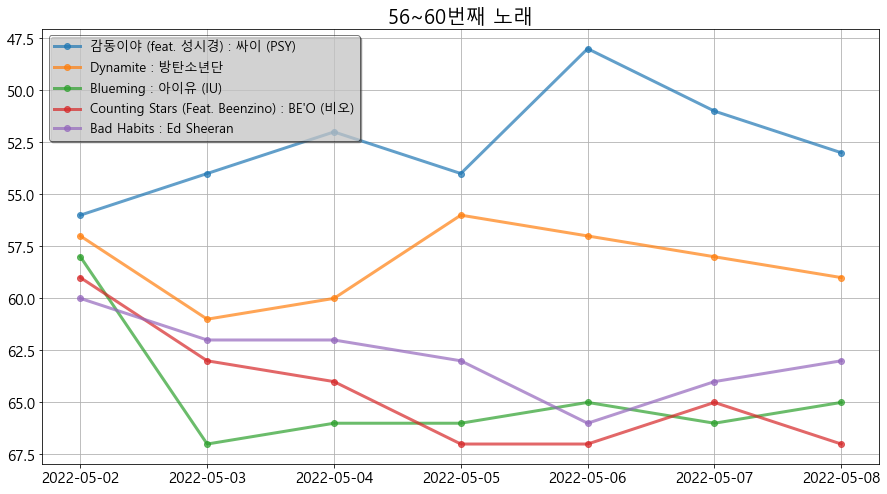

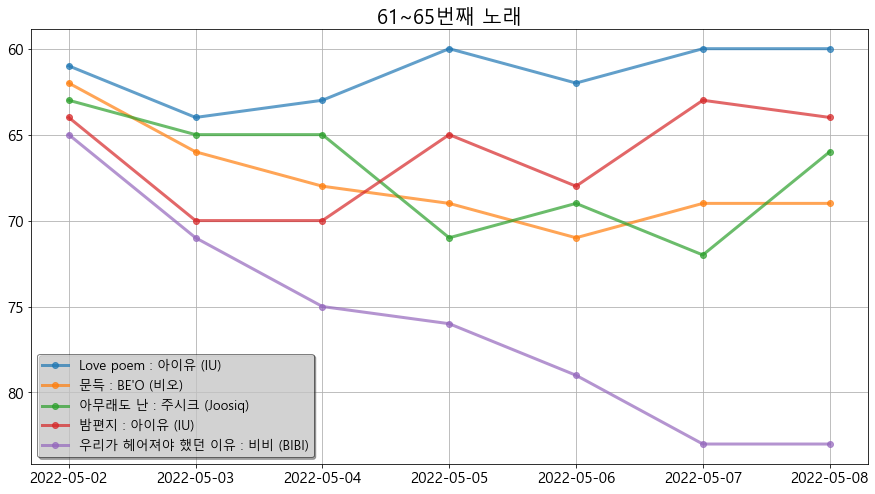

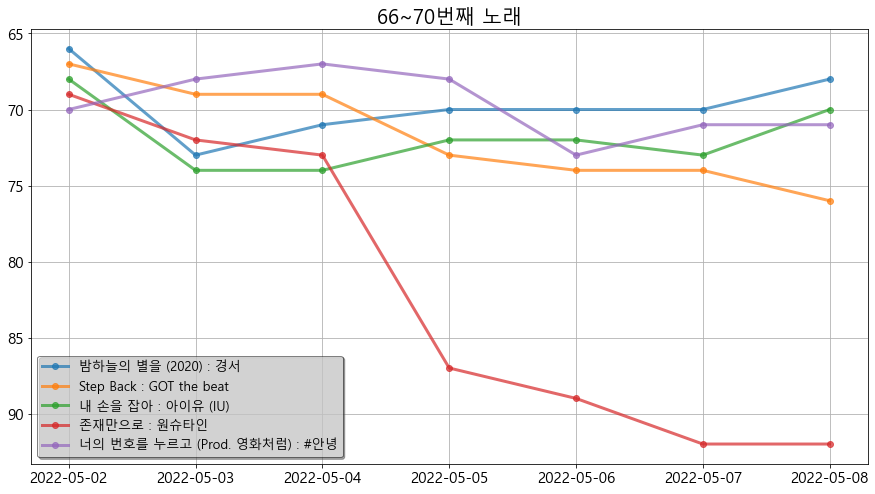

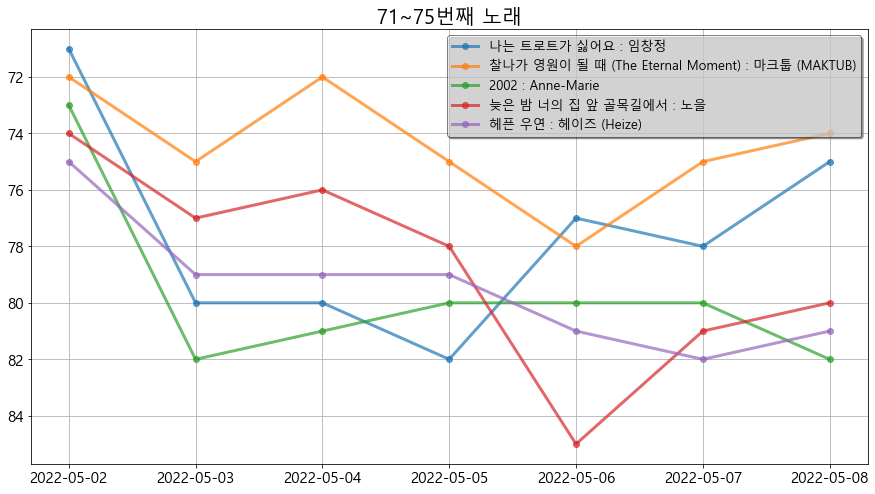

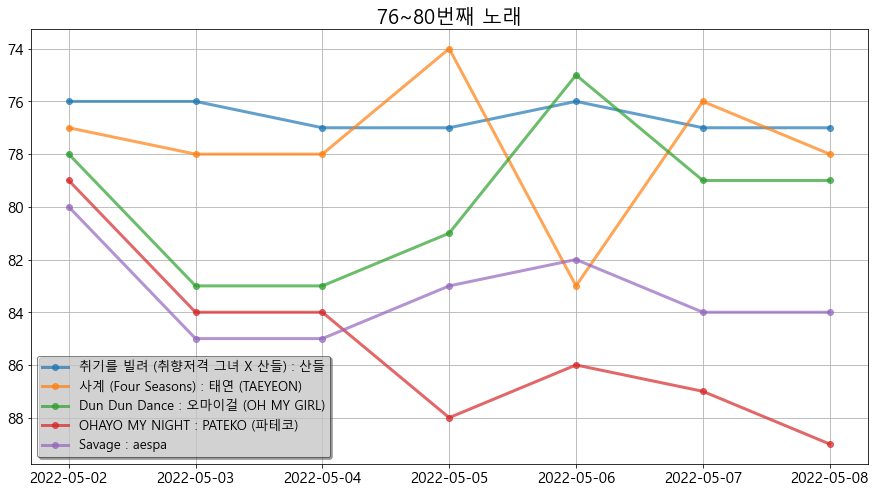

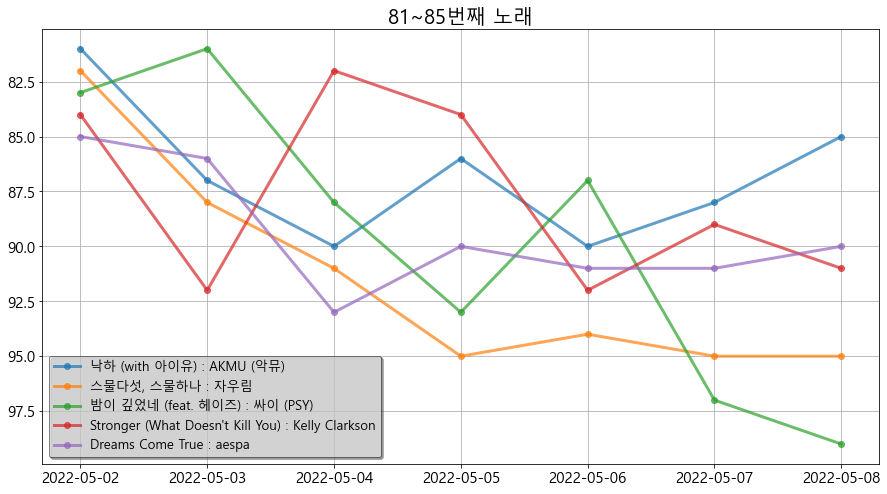

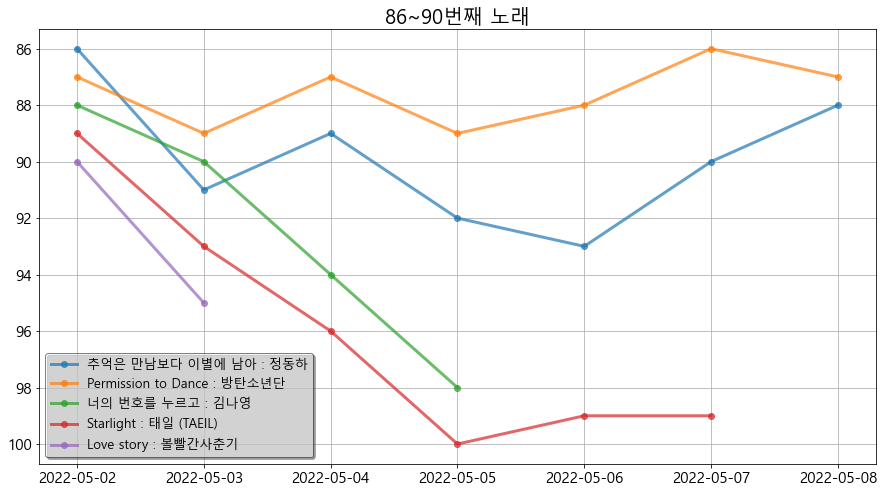

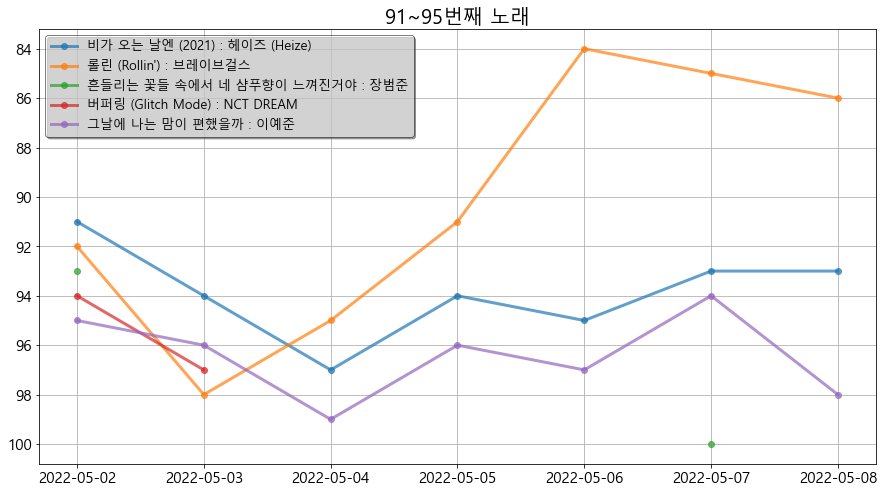

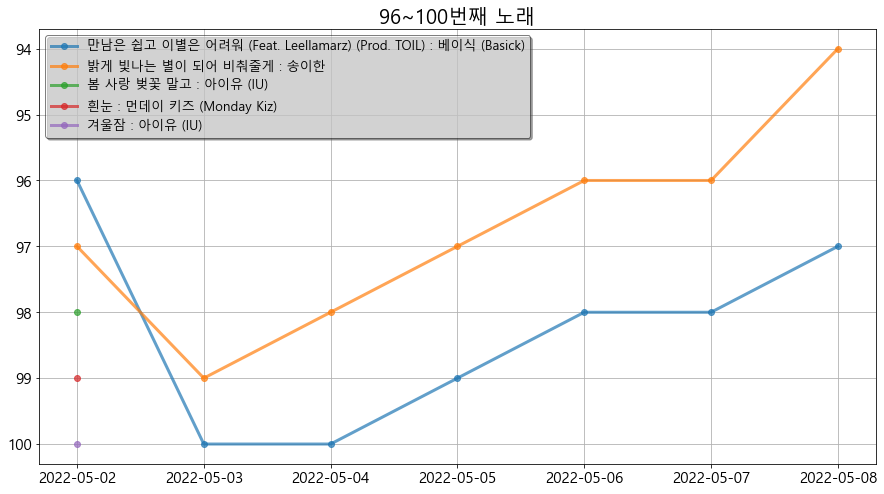

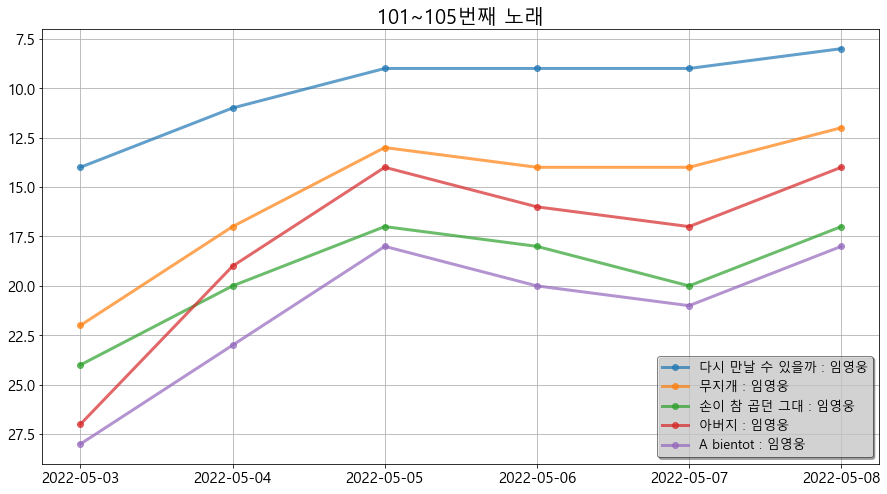

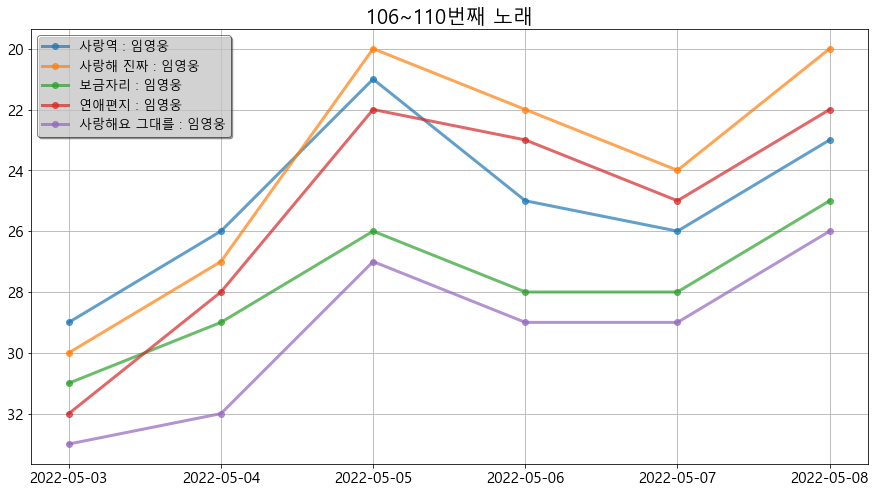

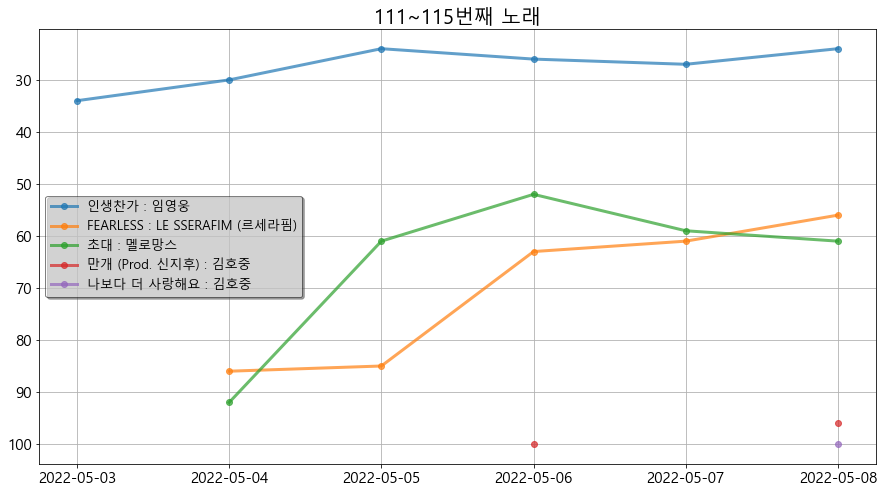

In [30]:
rank_graph(song_df_list, 5)

### 순위 변동 그래프

In [31]:
def change_rank_graph(df, number):
    t = 0
    for i in range( math.ceil(len(df)/number) ):
        plt.figure( figsize=(15, 6) )
        graph_df = df[i*number:(i+1)*number]
        for one in graph_df:
            title = one['곡'].value_counts().index.values[0]
            artist = one['가수'].value_counts().index.values[0]
            song_label = title + ' : ' + artist
            plt.plot(one['날짜'], one['순위변동'], '-o', label=song_label, alpha=0.7, linewidth=3)
        t =  t + number
        plt.grid(True)
        plt.title(f'{t-(number-1)}~{t}번째 노래', fontdict={'size':20})
        plt.xticks(fontsize=15)
        plt.yticks(fontsize=15)
        plt.legend(framealpha=0.5, fontsize=13, frameon=True, edgecolor='k', shadow=True)
        plt.show()

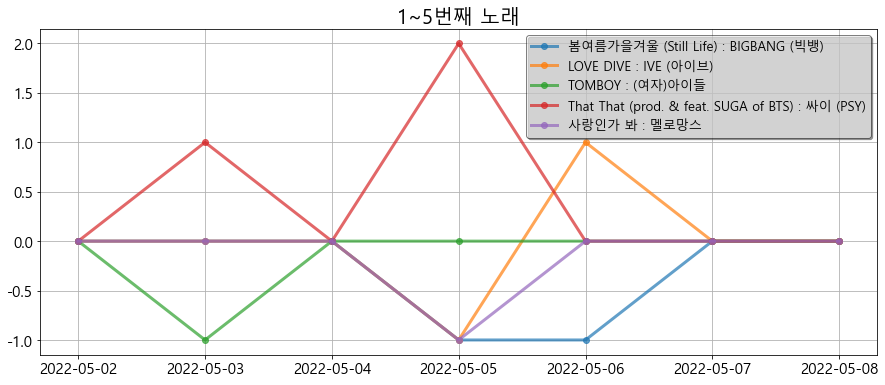

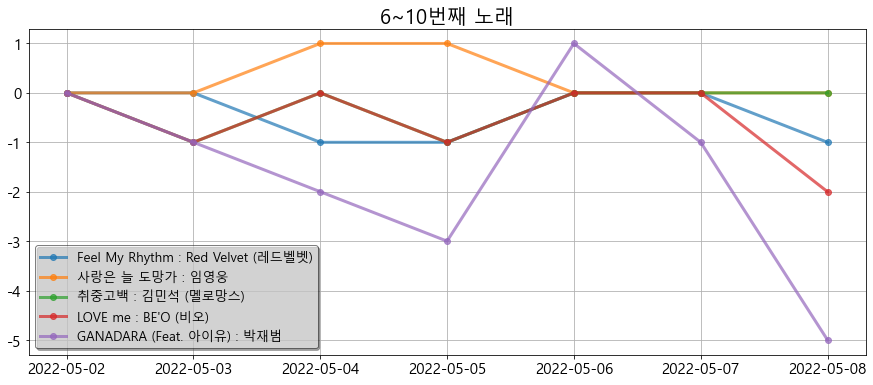

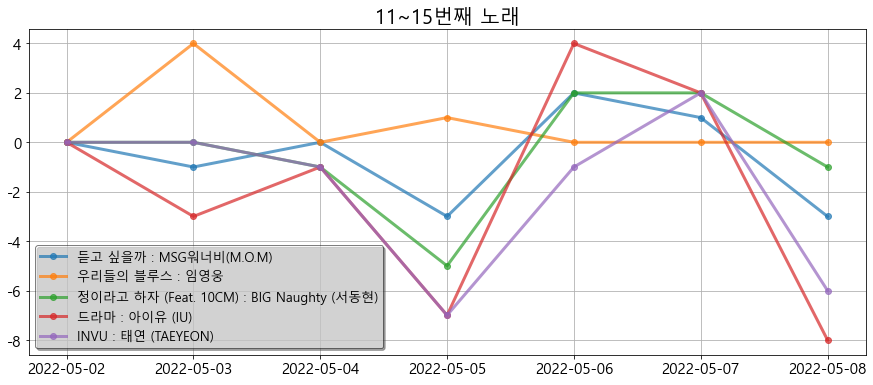

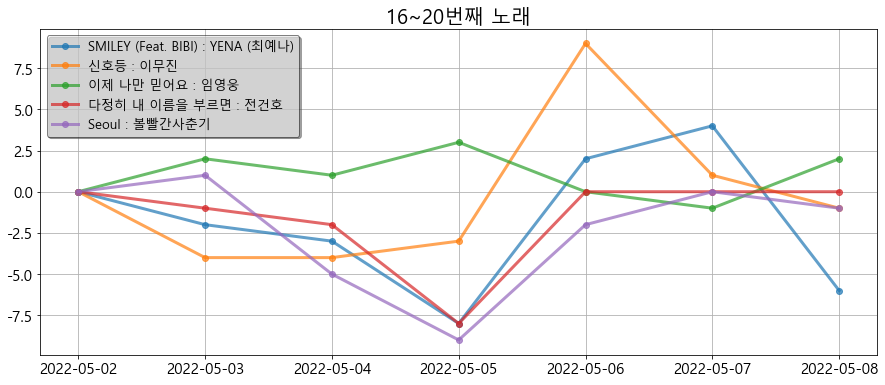

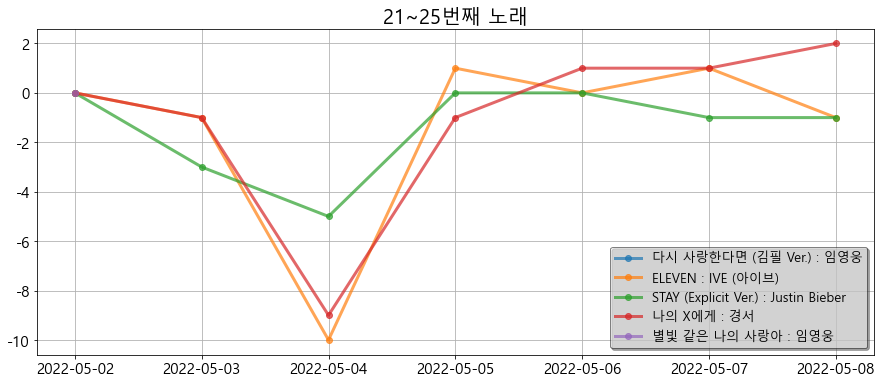

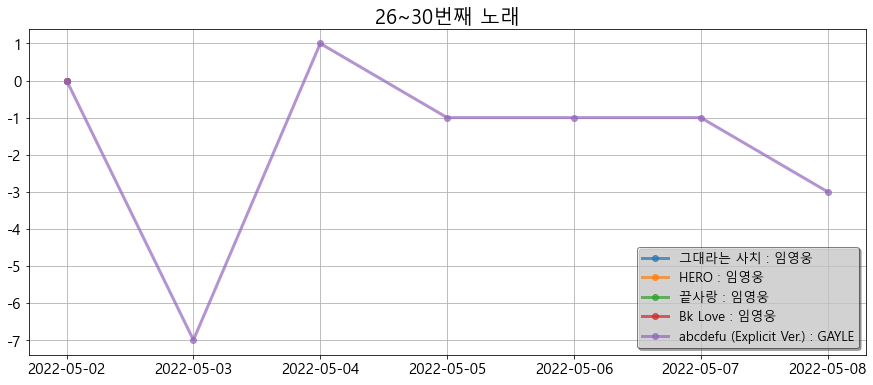

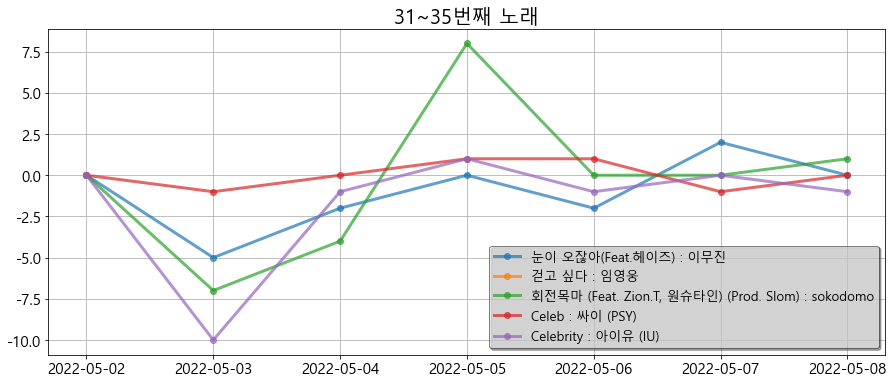

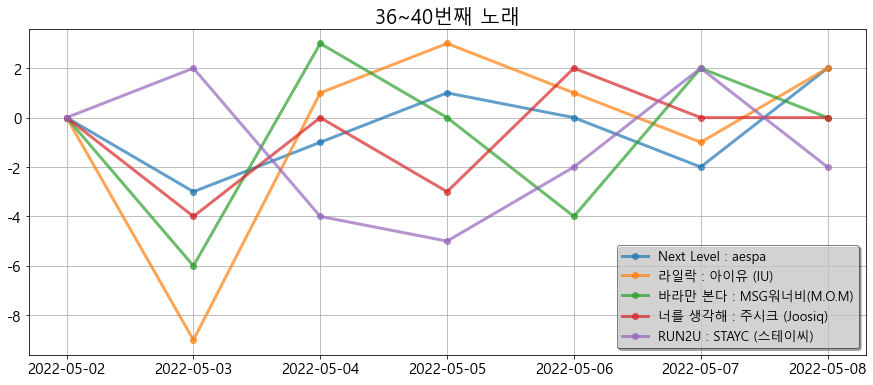

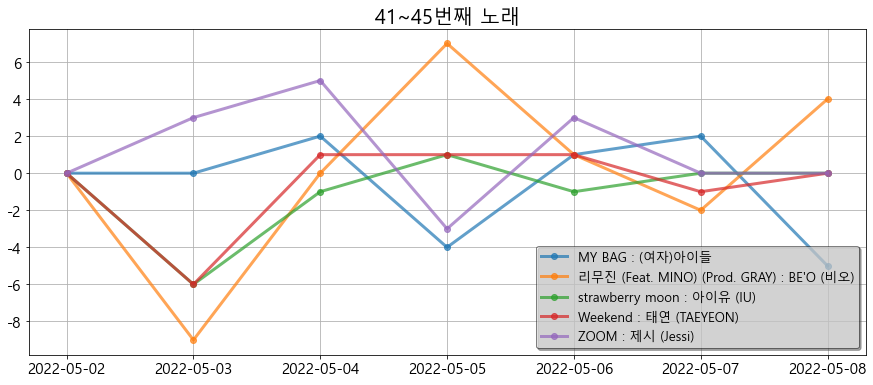

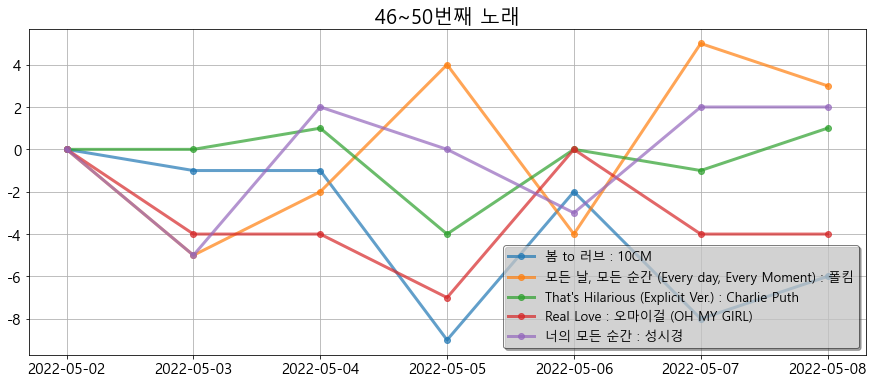

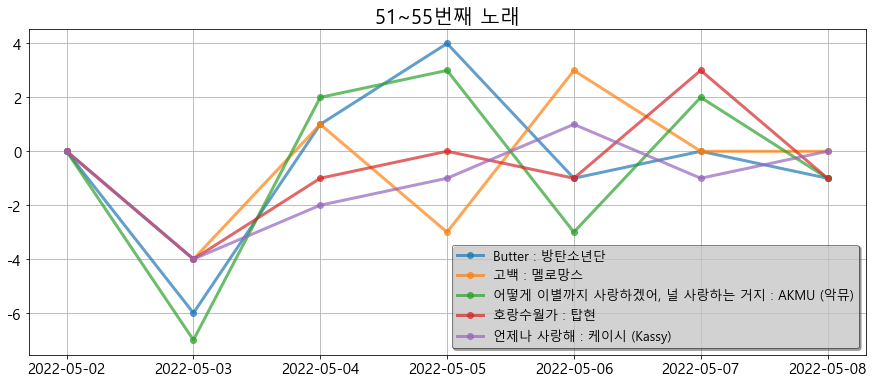

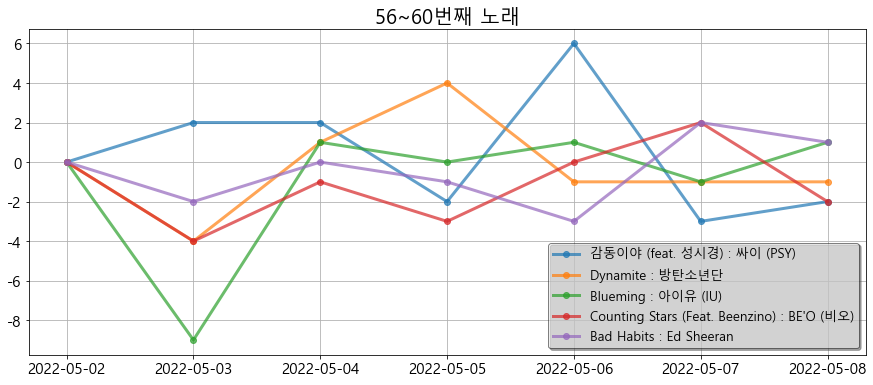

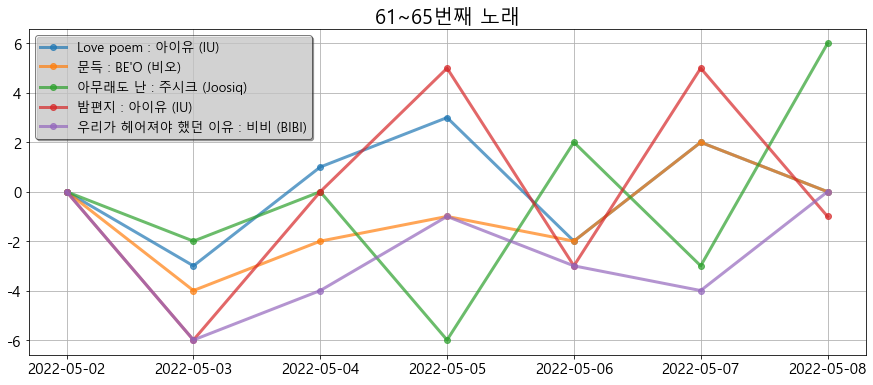

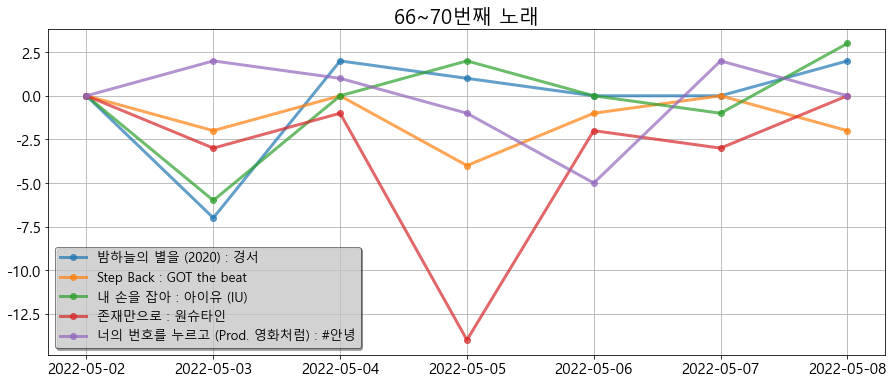

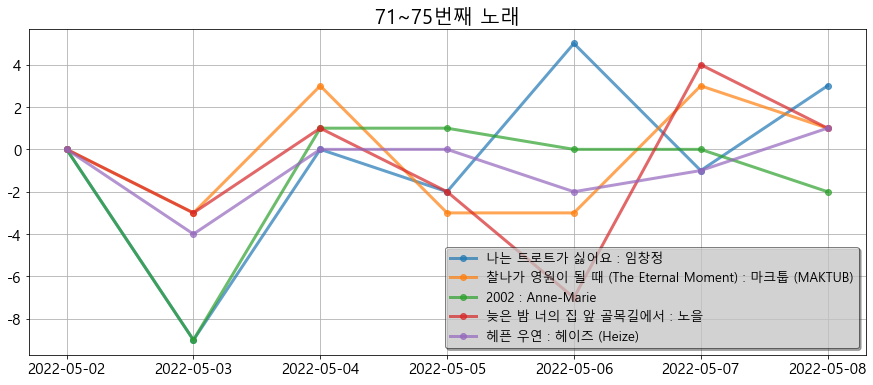

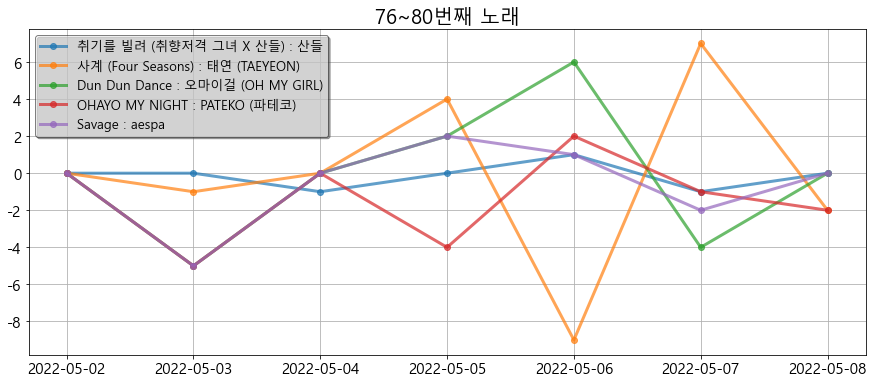

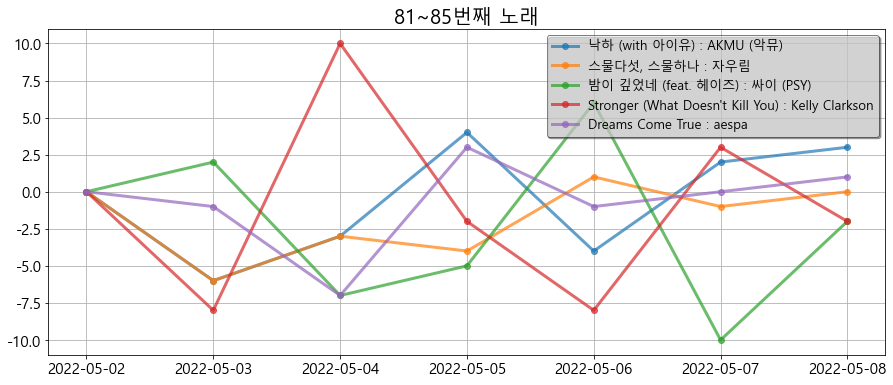

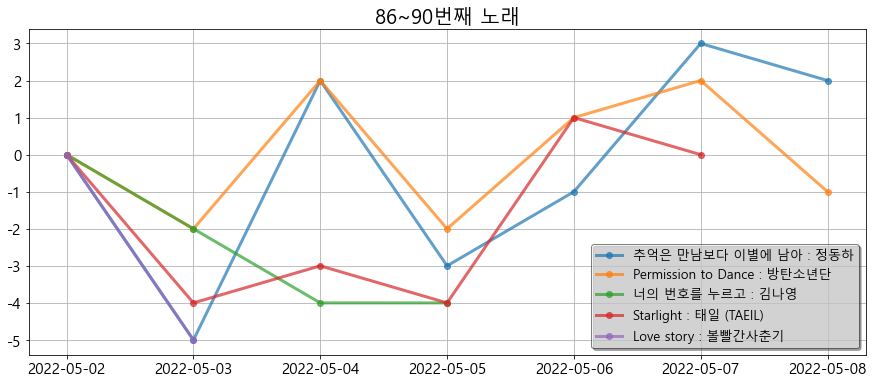

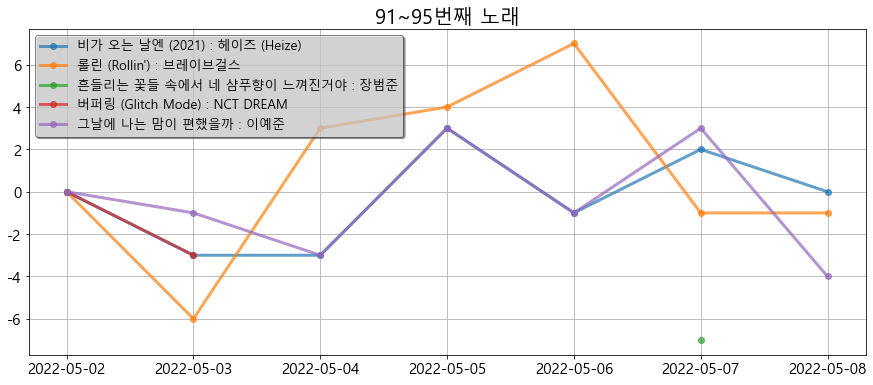

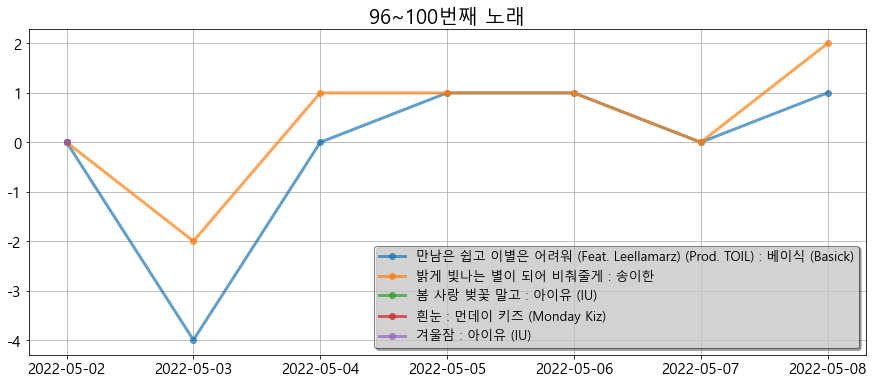

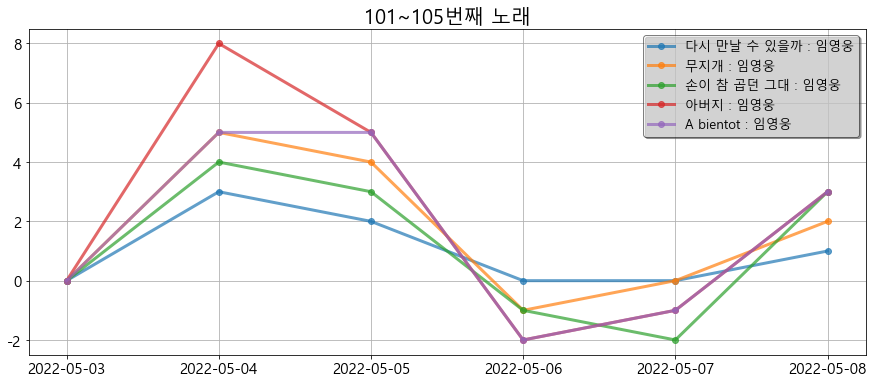

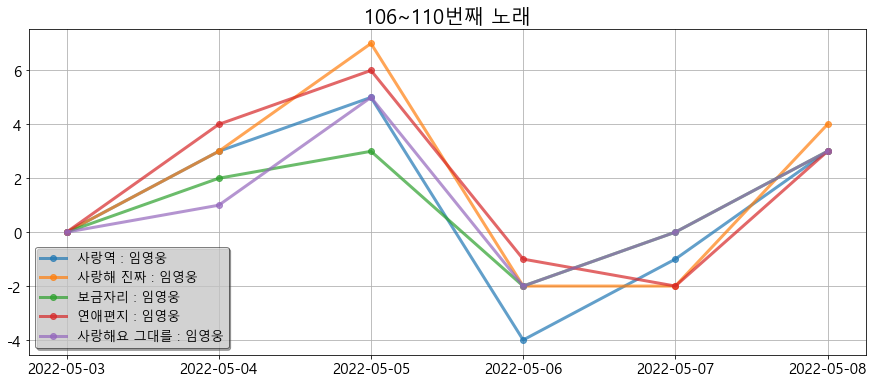

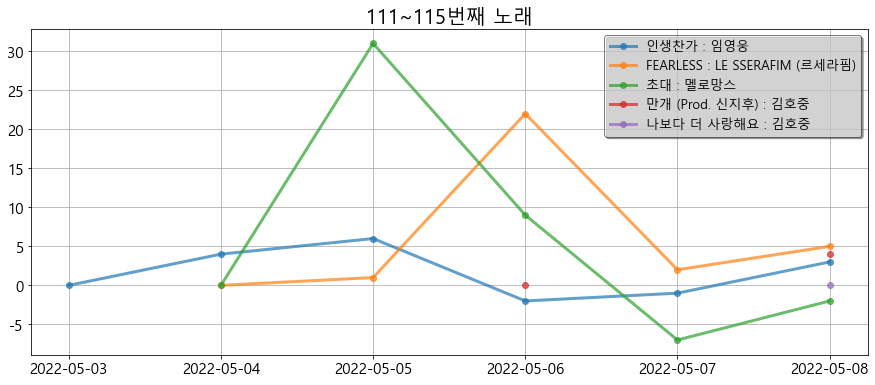

In [32]:
# 노래별 df, 노래 몇개씩 그래프에 나타날지 설정.
change_rank_graph(song_df_list, 5)

## 급등 음원 추출

### 모든 곡 데이터 병합

In [33]:
total_df = pd.DataFrame()
for one in song_df_list:
    total_df = pd.concat([total_df, one], ignore_index=True)

In [34]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 805 entries, 0 to 804
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      805 non-null    object 
 1   사이트     700 non-null    object 
 2   순위      700 non-null    float64
 3   곡       805 non-null    object 
 4   가수      805 non-null    object 
 5   앨범      805 non-null    object 
 6   소속사     700 non-null    object 
 7   소속사_분류  700 non-null    object 
 8   순위변동    700 non-null    float64
dtypes: float64(2), object(7)
memory usage: 56.7+ KB


In [35]:
total_df['순위변동'].describe()

count    700.000000
mean      -0.417143
std        3.280888
min      -14.000000
25%       -2.000000
50%        0.000000
75%        1.000000
max       31.000000
Name: 순위변동, dtype: float64

In [36]:
total_df[ total_df['순위변동'] > 0 ]['순위변동'].describe()

count    194.000000
mean       2.876289
std        3.049701
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       31.000000
Name: 순위변동, dtype: float64

In [37]:
Q1 = total_df[ total_df['순위변동'] > 0 ]['순위변동'].quantile(.25)
Q3 = total_df[ total_df['순위변동'] > 0 ]['순위변동'].quantile(.75)
IQR = Q3 - Q1
u_outlier = Q3 + 1.5*IQR
print(Q1, Q3, IQR, u_outlier)

1.0 3.0 2.0 6.0


### 이상치 곡 추출

In [38]:
outlier_df = total_df[ total_df['순위변동'] > u_outlier ].drop_duplicates(['곡', '가수'], ignore_index=True)
outlier_df

날짜  사이트    순위                                       곡  \
0  2022-05-06  flo  19.0                                     신호등   
1  2022-05-05  flo  36.0  회전목마 (Feat. Zion.T, 원슈타인) (Prod. Slom)   
2  2022-05-05  flo  44.0           리무진 (Feat. MINO) (Prod. GRAY)   
3  2022-05-07  flo  76.0                       사계 (Four Seasons)   
4  2022-05-04  flo  82.0        Stronger (What Doesn't Kill You)   
5  2022-05-06  flo  84.0                            롤린 (Rollin')   
6  2022-05-04  flo  19.0                                     아버지   
7  2022-05-05  flo  20.0                                  사랑해 진짜   
8  2022-05-06  flo  63.0                                FEARLESS   
9  2022-05-05  flo  61.0                                      초대   

                   가수                         앨범           소속사 소속사_분류  순위변동  
0                 이무진                        신호등       빅플래닛메이드     기타   9.0  
1            sokodomo         쇼미더머니 10 Episode 2    SONY MUSIC     기타   8.0  
2           BE'O (비오)         쇼미더머니 10 Episode 3            스윙     스윙   7.0  
3        태연 (TAEYEON)          사계 (Four Seasons)            SM     SM   7.0  
4      Kelly Clarkson  Stronger (Deluxe Version)            해외     기타  10.0  
5              브레이브걸스                    Rollin'         BRAVE     기타   7.0  
6                 임영웅                    IM HERO         물고기뮤직     기타   8.0  
7                 임영웅                    IM HERO         물고기뮤직     기타   7.0  
8  LE SSERAFIM (르세라핌)                   FEARLESS  SOURCE MUSIC     기타  22.0  
9                멜로망스                         초대         ABYSS     기타  31.0

In [39]:
# 이상치 곡 개수
print('이상치 곡의 개수 :', outlier_df.shape[0])

이상치 곡의 개수 : 10


In [40]:
mod_start_date = start_date.replace('-','')
mod_end_date = end_date.replace('-','')

path = f'C:/data/Wantreez/Crawling/music/crawled_data/outlier_data/{start_date}_{end_date}/{site_name}/'
os.makedirs(path, exist_ok=True)

In [43]:
# 이상치 음원 df 출력
outlier_df.to_excel(path + f'[{site_name}]{mod_start_date}_{mod_end_date}_outliers.xlsx', index=False)
print(f'[{site_name}]{mod_start_date}_{mod_end_date}_outliers.xlsx 출력')

[flo]20220502_20220508_outliers.xlsx 출력


### 급등 음원의 샘플 추출

In [152]:
big_change_music_name_list = outlier_df['곡'].tolist()
print('이상치 곡의 개수 :', len(big_change_music_name_list) ) 
print(big_change_music_name_list)

이상치 곡의 개수 : 10
['신호등', '회전목마 (Feat. Zion.T, 원슈타인) (Prod. Slom)', '리무진 (Feat. MINO) (Prod. GRAY)', '사계 (Four Seasons)', "Stronger (What Doesn't Kill You)", "롤린 (Rollin')", '아버지', '사랑해 진짜', 'FEARLESS', '초대']


In [153]:
temp = total_df[ total_df['곡'] == big_change_music_name_list[2] ].reset_index(drop=True)
temp

날짜  사이트    순위                              곡         가수  \
0  2022-05-02  flo  42.0  리무진 (Feat. MINO) (Prod. GRAY)  BE'O (비오)   
1  2022-05-03  flo  51.0  리무진 (Feat. MINO) (Prod. GRAY)  BE'O (비오)   
2  2022-05-04  flo  51.0  리무진 (Feat. MINO) (Prod. GRAY)  BE'O (비오)   
3  2022-05-05  flo  44.0  리무진 (Feat. MINO) (Prod. GRAY)  BE'O (비오)   
4  2022-05-06  flo  43.0  리무진 (Feat. MINO) (Prod. GRAY)  BE'O (비오)   
5  2022-05-07  flo  45.0  리무진 (Feat. MINO) (Prod. GRAY)  BE'O (비오)   
6  2022-05-08  flo  41.0  리무진 (Feat. MINO) (Prod. GRAY)  BE'O (비오)   

                   앨범 소속사 소속사_분류  순위변동  
0  쇼미더머니 10 Episode 3  스윙     스윙   0.0  
1  쇼미더머니 10 Episode 3  스윙     스윙  -9.0  
2  쇼미더머니 10 Episode 3  스윙     스윙   0.0  
3  쇼미더머니 10 Episode 3  스윙     스윙   7.0  
4  쇼미더머니 10 Episode 3  스윙     스윙   1.0  
5  쇼미더머니 10 Episode 3  스윙     스윙  -2.0  
6  쇼미더머니 10 Episode 3  스윙     스윙   4.0

In [154]:
title = temp['곡'].value_counts().index[0]
title

'리무진 (Feat. MINO) (Prod. GRAY)'

In [155]:
artist = temp['가수'].value_counts().index[0]
artist

"BE'O (비오)"

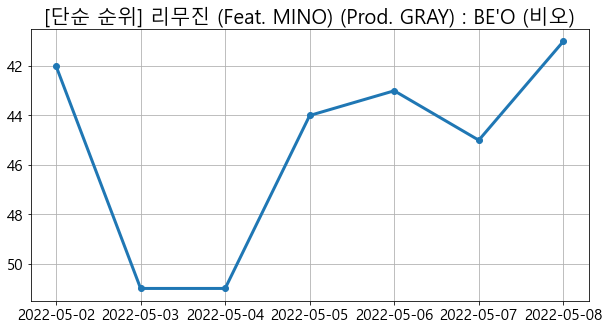

In [156]:
plt.figure(figsize=(10,5))
ax = plt.axes()
ax.invert_yaxis()
plt.grid(True, zorder=1)
plt.plot(temp['날짜'], temp['순위'], '-o', linewidth=3, zorder=2)
# plt.bar(temp['날짜'], temp['순위'], zorder=2, edgecolor='r', width=0.3, linestyle='-.', capstyle='round')
graph_title = '[단순 순위] ' + title + ' : ' + artist
plt.title(graph_title, fontdict={'size':20})
plt.xticks(temp['날짜'], fontsize=15)
plt.yticks(fontsize=15)
plt.show()

### 이상치 곡의 순위 그래프

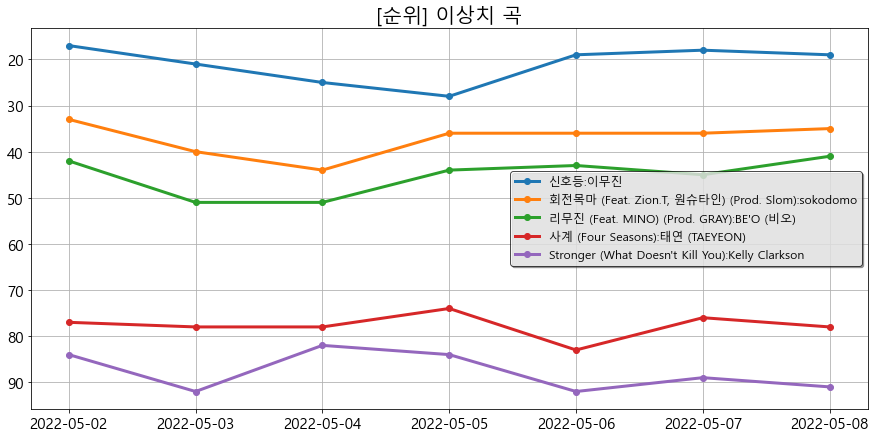

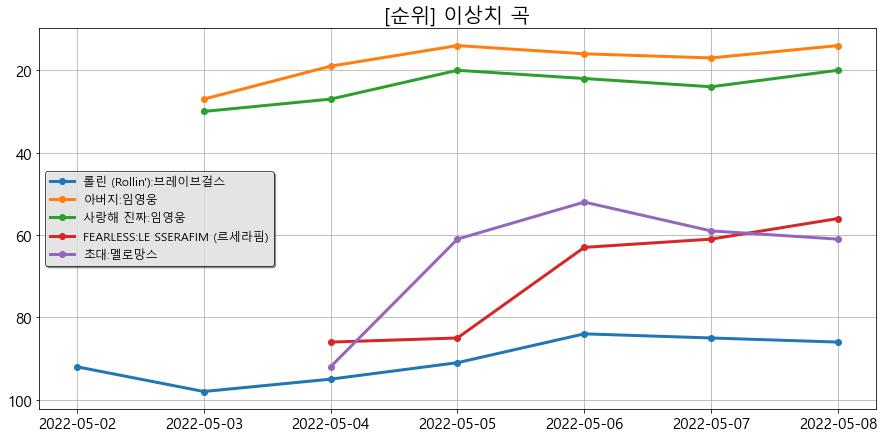

In [159]:
num = 5
for i in range( math.ceil(len(big_change_music_name_list)/num) ):
    plt.figure(figsize=(15,7))
    ax = plt.axes()
    ax.invert_yaxis()
    plt.grid(True)
    for one in big_change_music_name_list[i*num:(i+1)*num]:
        temp = total_df[ total_df['곡'] == one].reset_index(drop=True)
        title = temp['곡'].value_counts().index[0]
        artist = temp['가수'].value_counts().index[0]
        song_label = title + ':' + artist
        plt.plot(temp['날짜'], temp['순위'], '-o', linewidth=3, label=song_label)
        plt.title('[순위] 이상치 곡', fontdict={'size':20})
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.legend(frameon=True, shadow=True, framealpha=0.7, fontsize=12, edgecolor='k')
    img_name = f'[{site_name}]{start_date}_{end_date}_[순위]이상치{i+1}.png'
    plt.savefig(path + img_name)

### 이상치 곡의 순위변동 그래프

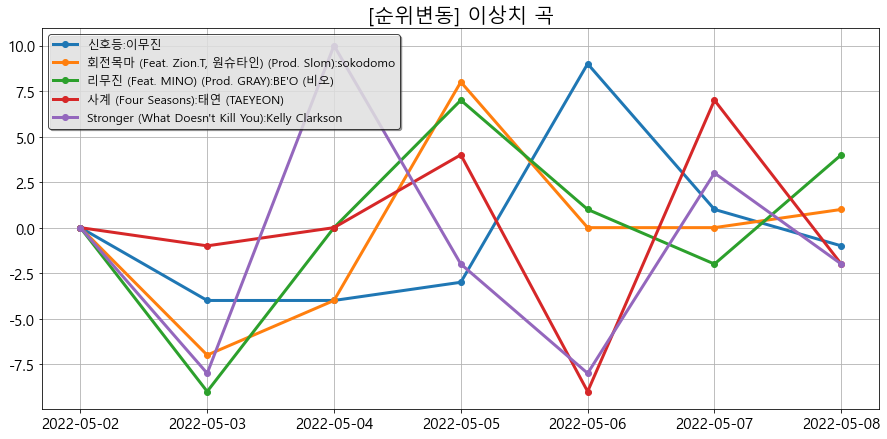

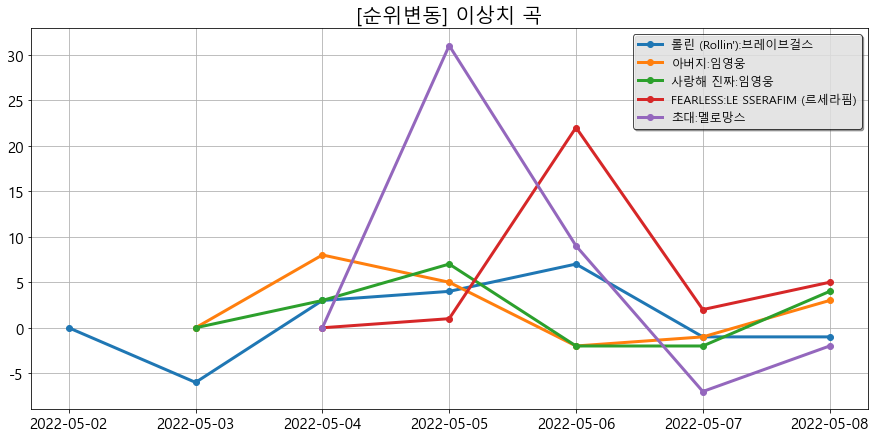

In [160]:
num = 5
for i in range( math.ceil(len(big_change_music_name_list)/num) ):
    plt.figure(figsize=(15,7))
    plt.grid(True)
    for one in big_change_music_name_list[i*num:(i+1)*num]:
        temp = total_df[ total_df['곡'] == one].reset_index(drop=True)
        title = temp['곡'].value_counts().index[0]
        artist = temp['가수'].value_counts().index[0]
        song_label = title + ':' + artist
        plt.plot(temp['날짜'], temp['순위변동'], '-o', linewidth=3, label=song_label)
        plt.title('[순위변동] 이상치 곡', fontdict={'size':20})
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.legend(frameon=True, shadow=True, framealpha=0.7, fontsize=12, edgecolor='k')
    img_name = f'[{site_name}]{start_date}_{end_date}_[순위변동]이상치{i+1}.png'
    plt.savefig(path + img_name)

## 이상치 곡의 구글 트랜드 분석

In [161]:
try:
    os.chdir(code_path)
except:
    pass

In [162]:
ca.install(True)
driver = webdriver.Chrome()

## 구글 트렌드 정리

In [163]:
start_date, end_date

('2022-05-02', '2022-05-08')

In [164]:
for one in big_change_music_name_list:
    # 구글 트렌트 접속
    url = 'https://trends.google.co.kr/trends/?geo=KR'
    driver.get(url)
    driver.implicitly_wait(3)
    time.sleep( random.uniform(1, 1.5) )
    driver.maximize_window()
    # 검색어 입력
    search_box = driver.find_elements_by_css_selector('input')[1]
    search_box.clear()
    search_box.send_keys(one)
    time.sleep(0.5)
    search_box.send_keys(Keys.ENTER)
    driver.implicitly_wait(3)
    time.sleep( random.uniform(1.5, 2) )
    
    # csv 파일 다운
    driver.find_element_by_css_selector('button.widget-actions-item.export').click()
    time.sleep( random.uniform(1, 1.5) )

    # 파일 이름 변경
    search_artist = total_df[total_df['곡'] == one]['가수'].unique()[0]
    search_title = one.replace(' ', '_')
    today_date = datetime.today().strftime('%Y%m%d_%H%M%S')
    file_oldname = os.path.join('C:/Users/kbjung/Downloads', 'multiTimeline.csv')
    file_newname = os.path.join('C:/Users/kbjung/Downloads', f'[{site_name}]{today_date}_{search_title}_{search_artist}.csv')
    os.rename(file_oldname, file_newname)
    time.sleep(2)

C:\Users\kbjung\AppData\Local\Temp/ipykernel_10892/689724725.py:9: DeprecationWarning: find_elements_by_css_selector is deprecated. Please use find_elements(by=By.CSS_SELECTOR, value=css_selector) instead
  search_box = driver.find_elements_by_css_selector('input')[1]
C:\Users\kbjung\AppData\Local\Temp/ipykernel_10892/689724725.py:18: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  driver.find_element_by_css_selector('button.widget-actions-item.export').click()


In [165]:
driver.quit()

### 파일 이동

In [166]:
import glob
import shutil

In [167]:
try:
    os.chdir('C:/Users/kbjung/Downloads')
except:
    pass

In [168]:
os.listdir()

['(주)원트리즈뮤직_휴가계(양식).doc',
 'Anaconda3-2021.05-Windows-x86_64.exe',
 'Anaconda3-2021.11-Windows-x86_64.exe',
 'backup',
 'D2Coding.ttf',
 'desktop.ini',
 'DiscordSetup.exe',
 'LanguageFile_ko-KR_Kim Y. Ch. + CJW Patch_2.xml',
 'SumatraPDF-3.3.3-64-install.exe',
 'VSCodeUserSetup-x64-1.66.1.exe',
 '[flo]20220509_131531_신호등_이무진.csv',
 '[flo]20220509_131539_회전목마_(Feat._Zion.T,_원슈타인)_(Prod._Slom)_sokodomo.csv',
 "[flo]20220509_131546_리무진_(Feat._MINO)_(Prod._GRAY)_BE'O (비오).csv",
 '[flo]20220509_131554_사계_(Four_Seasons)_태연 (TAEYEON).csv',
 "[flo]20220509_131602_Stronger_(What_Doesn't_Kill_You)_Kelly Clarkson.csv",
 "[flo]20220509_131610_롤린_(Rollin')_브레이브걸스.csv",
 '[flo]20220509_131618_아버지_임영웅.csv',
 '[flo]20220509_131625_사랑해_진짜_임영웅.csv',
 '[flo]20220509_131633_FEARLESS_LE SSERAFIM (르세라핌).csv',
 '[flo]20220509_131641_초대_멜로망스.csv',
 '당직스케줄_20220426.xlsx',
 '이상치분석']

In [169]:
csv_file_list = glob.glob('*.csv')
csv_file_list

['[flo]20220509_131531_신호등_이무진.csv',
 '[flo]20220509_131539_회전목마_(Feat._Zion.T,_원슈타인)_(Prod._Slom)_sokodomo.csv',
 "[flo]20220509_131546_리무진_(Feat._MINO)_(Prod._GRAY)_BE'O (비오).csv",
 '[flo]20220509_131554_사계_(Four_Seasons)_태연 (TAEYEON).csv',
 "[flo]20220509_131602_Stronger_(What_Doesn't_Kill_You)_Kelly Clarkson.csv",
 "[flo]20220509_131610_롤린_(Rollin')_브레이브걸스.csv",
 '[flo]20220509_131618_아버지_임영웅.csv',
 '[flo]20220509_131625_사랑해_진짜_임영웅.csv',
 '[flo]20220509_131633_FEARLESS_LE SSERAFIM (르세라핌).csv',
 '[flo]20220509_131641_초대_멜로망스.csv']

In [170]:
path

'C:/data/Wantreez/Crawling/music/crawled_data/outlier_data/2022-05-02_2022-05-08/flo/'

In [171]:
for file in csv_file_list:
    des = path + file
    shutil.move(file, des)

# 코드 마지막